# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#ask gretel if this is needed
# Output File (CSV)
#output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build query URL
query_url = url + "appid=" + weather_api_key + "&q="

print(query_url)


http://api.openweathermap.org/data/2.5/weather?appid=15cb2043ba0bca628bcbf44aa8cd6e24&q=


In [7]:
# set up lists to hold reponse info
lat = []
lng = []
temp = []
new_cities = []
humidity = []
max_temp = []
cloudiness = []
wind_speed = []
country = []
date = []
count_one = 1


# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city + '&units=imperial')
        # print(city)
        # print(response.content)
        response_json = response.json()
        lat.append(response_json['coord']['lat'])
        lng.append(response_json['coord']['lon'])
        temp.append(response_json['main']['temp_max'])
        humidity.append(response_json['main']['humidity'])
        wind_speed.append(response_json['wind']['speed'])
        cloudiness.append(response_json['clouds']['all'])
        country.append(response_json['sys']['country'])
        date.append(response_json['dt'])
        new_cities.append(response_json['name'])
        print(f"Retrieving record {count_one}: {response_json['name']}.")
        count_one += 1
        #print(f"{city} has been added to the weather data.")
    except:
        print(f"City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Retrieving record 1: Hasaki.
Retrieving record 2: Barrow.
Retrieving record 3: Albany.
Retrieving record 4: Dunedin.
Retrieving record 5: Ushuaia.
Retrieving record 6: Bethel.
Retrieving record 7: Clyde River.
Retrieving record 8: Krasnyy Kholm.
Retrieving record 9: Mahébourg.
Retrieving record 10: Dolores.
Retrieving record 11: Nouna.
Retrieving record 12: Wellington.
Retrieving record 13: Arraial do Cabo.
Retrieving record 14: Nouadhibou.
Retrieving record 15: The Pas.
Retrieving record 16: Narsaq.
Retrieving record 17: Tabuk.
Retrieving record 18: Vaitape.
Retrieving record 19: Busselton.
Retrieving record 20: Hermanus.
Retrieving record 21: Yellowknife.
Retrieving record 22: Tyukalinsk.
Retrieving record 23: Laas.
Retrieving record 24: Margate.
Retrieving record 25: Kaitangata.
Retrieving record 26: Palana.
Retrieving record 27: Esperance.
City not found. Skipping...
Retrieving record 28: Castro.
Retrieving record 29: Puerto Ayora.
Retrieving record 30: Port Alfred.
Retrieving reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
weather_dict = {
    "City": new_cities,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}

#change to F and MPH
weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv('weather_data.csv')
weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hasaki,35.7333,140.8333,41.40,93,100,17.40,JP,1644287316
1,Barrow,71.2906,-156.7887,-27.38,68,0,6.91,US,1644287016
2,Albany,42.6001,-73.9662,35.82,92,100,0.49,US,1644287123
3,Dunedin,-45.8742,170.5036,62.56,67,1,6.04,NZ,1644287317
4,Ushuaia,-54.8000,-68.3000,58.66,82,100,4.61,AR,1644286896
...,...,...,...,...,...,...,...,...,...
549,Jiazi,22.8779,116.0670,61.90,71,58,12.59,CN,1644287565
550,Acapulco de Juárez,16.8634,-99.8901,78.62,78,40,8.05,MX,1644287473
551,Maragogi,-9.0122,-35.2225,77.50,77,18,5.91,BR,1644287566
552,Al Bardīyah,31.7561,25.0865,55.38,51,82,18.28,LY,1644287567


In [9]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,5.540000e+02
mean,19.891329,15.059727,50.205325,73.319495,56.750903,8.203899,1.644287e+09
std,33.553736,91.150996,30.201847,21.147226,41.655906,6.904769,1.217596e+02
min,-54.800000,-175.200000,-43.470000,9.000000,0.000000,0.000000,1.644287e+09
25%,-9.060275,-65.612700,32.902500,63.000000,6.000000,3.510000,1.644287e+09
50%,25.717550,20.405200,59.945000,77.000000,73.000000,6.150000,1.644287e+09
75%,46.842575,95.183325,74.247500,90.000000,100.000000,10.360000,1.644288e+09
max,78.218600,179.316700,91.710000,100.000000,100.000000,50.940000,1.644288e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
#I skipped this step because there were no cities with humidity over 100%.

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [11]:
#this is setting up the variables for the visualizations
latitude = weather_data["Lat"]
humidity = weather_data['Humidity']
maxtemp = weather_data['Max Temp']
clouds = weather_data['Cloudiness']
windspeed = weather_data['Wind Speed']

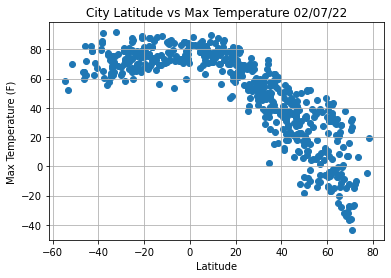

In [66]:
plt.scatter(latitude, maxtemp)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs Max Temperature 02/07/22')
plt.grid()
plt.savefig('Images/lat_vs_temp.png')
plt.show()

In [13]:
#After analyzing the data, there does appear to be a correlation between latitude and the max temperatures. The temperatures around the equator are the highest
#which is expected and the lower temperatures are near the polar caps. It would make sense that the north pole would be colder seeing as it is a frozen ocean
#compared to a frozen landmass like Antarctica.

## Latitude vs. Humidity Plot

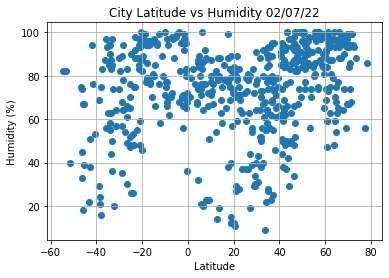

In [67]:
plt.scatter(latitude, humidity)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity 02/07/22')
plt.grid()
plt.savefig('Images/lat_vs_humidity.png')
plt.show()

In [15]:
#At first, there didn't appear to be any kind of correlation between latitude and humidity but after
#looking at a world map, the outliers between 0 and 40 degrees latitude could include the Saharan Desert
#which explains the big dips in humidity. Between -20 to -40 degrees latitude there are more outliers that could
#be explained by one of the test cities being in Australia or South Africa. Other than those outliers,
#there is not an apparent correlation between latitude and humidity.

## Latitude vs. Cloudiness Plot

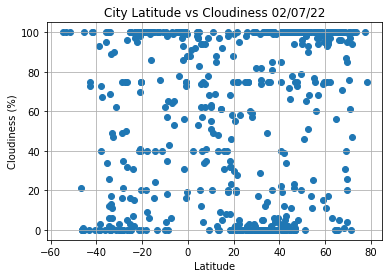

In [68]:
plt.scatter(latitude, clouds)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness 02/07/22')
plt.grid()
plt.savefig('Images/lat_vs_cloudiness.png')
plt.show()

In [17]:
#For cloudiness versus latitude, there is no correlation. At any given latitude, cloudiness
#data covers the full available range. For example, the equator includes data from areas 
#like Brazil and Indonesia which get a lot of rainfall, therefore, more clouds. There are also areas 
#which include deserts that don't have a lot of clouds.


## Latitude vs. Wind Speed Plot

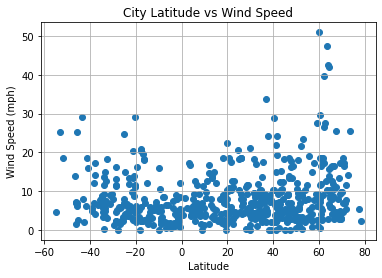

In [18]:

plt.scatter(latitude, windspeed)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs Wind Speed')
plt.grid()
plt.savefig('Images/lat_vs_windspeed.png')
plt.show()

In [19]:
weather_data.sort_values(by=['Wind Speed'], ascending=False).head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
296,Nanortalik,60.1432,-45.2371,10.31,69,100,50.94,GL,1644287156
135,Vestmannaeyjar,63.4427,-20.2734,29.91,79,100,47.33,IS,1644287374
307,Grindavik,63.8424,-22.4338,28.87,100,100,42.57,IS,1644287452
320,Hofn,64.2539,-15.2082,32.07,70,100,41.92,IS,1644287458
99,Klaksvík,62.2266,-6.5890,36.52,63,97,39.77,FO,1644287358
311,Milos,36.7500,24.4333,56.52,80,1,33.78,GR,1644287453
63,Brae,60.3964,-1.3530,42.71,74,100,29.73,GB,1644287342
39,Poum,-20.2333,164.0167,81.55,88,100,29.08,NC,1644287330
82,Rawson,-43.3002,-65.1023,82.60,22,0,28.99,AR,1644287350
487,Panórama,40.5878,23.0315,40.95,61,40,28.77,GR,1644287540


In [20]:
#Overall there is no correlation between wind speed and city latitude but there are some major outliers that are mainly in the northern hemisphere and
#primarily in Greenland. Historically in Greenland, the summers are cold, the winters are long, freezing, snowy, and windy; and it is overcast year-round.

## Linear Regression

In [21]:
#Here I created two different dataframes for the Northern and Southern Hemispheres
northern_df = weather_data.loc[weather_data["Lat"] >= 0]
southern_df = weather_data.loc[weather_data['Lat'] < 0]

#Here I created the different varaibles based on the Northern and Southern Hemispheres
ntemp = northern_df['Max Temp']
stemp = southern_df['Max Temp']
nlat = northern_df["Lat"]
slat =southern_df["Lat"]
nhumid = northern_df["Humidity"]
shumid = southern_df["Humidity"]
ncloud = northern_df["Cloudiness"]
scloud = southern_df["Cloudiness"]
nwind = northern_df["Wind Speed"]
swind = southern_df["Wind Speed"]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7440620089370837


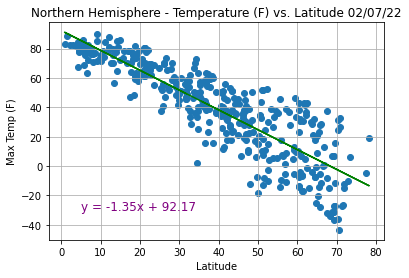

In [46]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(nlat, ntemp)
regress_values = nlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nlat, ntemp)
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Northern Hemisphere - Temperature (F) vs. Latitude 02/07/22')
plt.plot(nlat, regress_values,"g-")
plt.annotate(line_eq,(5,-30),fontsize=12,color="purple")
plt.grid()
print(f"The r-value is: {rvalue**2}")
plt.savefig('Images/northernlat_vs_temp.png')
plt.show()

In [47]:
def regression(lat, weather, ylabel, title, filepath):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(lat, weather)
    regress_values = lat * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(lat, weather)
    plt.xlabel('Latitude')
    plt.ylabel(ylabel)
    plt.title(f'{title} vs. Latitude 02/07/22')
    plt.plot(lat, regress_values,"g-")
    plt.annotate(line_eq,(5,-30),fontsize=12,color="purple")
    plt.grid()
    print(f"The r-value is: {rvalue**2}")
    plt.savefig(filepath)
    plt.show()

In [48]:
#In the northern hemisphere it would make sense that the temperature would get lower as you get closer to the north pole. The linear regression proves this by
#having an r-value of 0.8 which is a strong positive correlation. 
ntemp.describe()

count    380.000000
mean      39.361026
std       30.425514
min      -43.470000
25%       20.157500
50%       41.770000
75%       63.710000
max       89.580000
Name: Max Temp, dtype: float64

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.1134581696052349


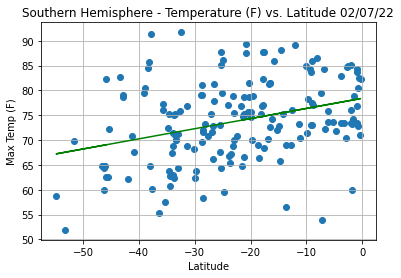

In [49]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(slat, stemp)
regress_values = slat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(slat, stemp)
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Southern Hemisphere - Temperature (F) vs. Latitude 02/07/22')
plt.plot(slat, regress_values,"g-")
plt.annotate(line_eq,(-50,40),fontsize=12,color="purple")
plt.grid()
print(f"The r-value is: {rvalue**2}")
plt.savefig('Images/southernlat_vs_temp.png')
plt.show()

In [50]:
#For the southern hemisphere, the r-value is also very low indicating that there is not a big correlation.
stemp.describe()

count    174.000000
mean      73.888276
std        8.079780
min       51.910000
25%       68.947500
50%       73.660000
75%       79.010000
max       91.710000
Name: Max Temp, dtype: float64

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.1264832114097617


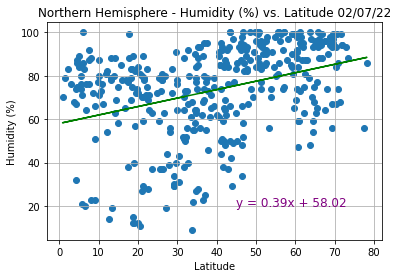

In [51]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(nlat, nhumid)
regress_values = nlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nlat, nhumid)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude 02/07/22')
plt.plot(nlat, regress_values,"g-")
plt.annotate(line_eq,(45, 20),fontsize=12,color="purple")
plt.grid()
print(f"The r-value is: {rvalue**2}")
plt.savefig('Images/northernlat_vs_humidity.png')
plt.show()

In [52]:
#The r-value for this scatter plot is relatively low and there is a wide distribution of data so there is no real correlation between latitude and 
#humidity in the northern hemisphere. 
nhumid.describe()

count    380.000000
mean      73.242105
std       21.271565
min        9.000000
25%       63.000000
50%       78.000000
75%       89.000000
max      100.000000
Name: Humidity, dtype: float64

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.1491634094856246


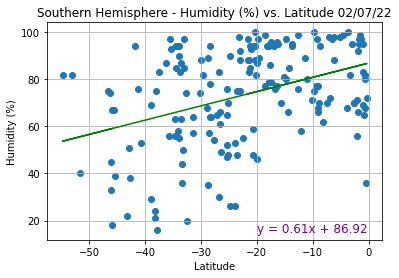

In [53]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(slat, shumid)
regress_values = slat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(slat, shumid)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude 02/07/22')
plt.plot(slat, regress_values,"g-")
plt.annotate(line_eq,(-20, 15),fontsize=12,color="purple")
plt.grid()
print(f"The r-value is: {rvalue**2}")
plt.savefig('Images/southernlat_vs_humidity.png')
plt.show()

The r-value is: 0.1491634094856246


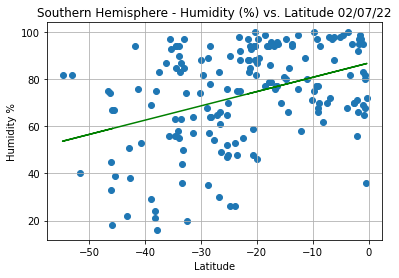

In [54]:
#I was able to create a function to run the same code but did this after the homework was submitted
regression(slat, shumid, 'Humidity %', 'Southern Hemisphere - Humidity (%)', 'Images/southernlat_vs_humidity.png')

In [55]:
#The r-value for this scatter plot is relatively low so there is no real correlation between latitude and 
#humidity in the southern hemisphere as well. 
shumid.describe()

count    174.000000
mean      73.488506
std       20.933072
min       16.000000
25%       63.000000
50%       77.000000
75%       92.000000
max      100.000000
Name: Humidity, dtype: float64

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.07353521024894571


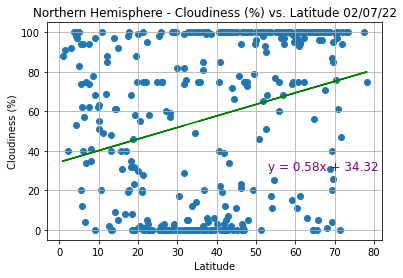

In [56]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(nlat, ncloud)
regress_values = nlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nlat, ncloud)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude 02/07/22')
plt.plot(nlat, regress_values,"g-")
plt.annotate(line_eq,(53, 30),fontsize=12,color="purple")
plt.grid()
print(f"The r-value is: {rvalue**2}")
plt.savefig('Images/northernlat_vs_cloudiness.png')
plt.show()

In [57]:
#As far as the correlation between cloudiness and latitude in the northern hemisphere, the r-value is very close to 0 indicating
#that there is no relationship. 
ncloud.describe()

count    380.000000
mean      57.168421
std       41.874206
min        0.000000
25%        5.000000
50%       74.000000
75%      100.000000
max      100.000000
Name: Cloudiness, dtype: float64

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.10026101864831358


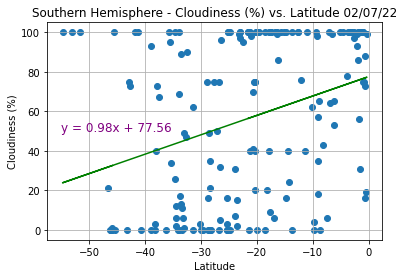

In [58]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(slat, scloud)
regress_values = slat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(slat, scloud)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude 02/07/22')
plt.plot(slat, regress_values,"g-")
plt.annotate(line_eq,(-55, 50),fontsize=12,color="purple")
plt.grid()
print(f"The r-value is: {rvalue**2}")
plt.savefig('Images/southernlat_vs_cloudiness.png')
plt.show()

In [59]:
#For the correlation between cloudiness and latitude in the southern hemisphere, the r-value is very close to 0 indicating
#that there is no relationship.
scloud.describe()

count    174.00000
mean      55.83908
std       41.28048
min        0.00000
25%        9.50000
50%       66.00000
75%      100.00000
max      100.00000
Name: Cloudiness, dtype: float64

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04282319775479945


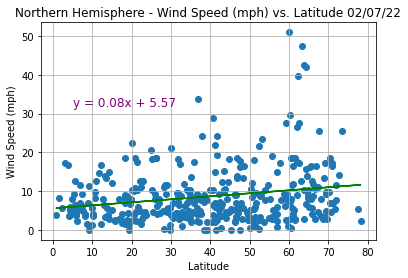

In [60]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(nlat, nwind)
regress_values = nlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nlat, nwind)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude 02/07/22')
plt.plot(nlat, regress_values,"g-")
plt.annotate(line_eq,(5, 32),fontsize=12,color="purple")
plt.grid()
print(f"The r-value is: {rvalue**2}")
plt.savefig('Images/northernlat_vs_windspeed.png')
plt.show()

In [61]:
#Overall, there is no correlation between wind speed and latitude in the northern hemisphere.
print(nwind.describe())
northern_df.sort_values(by=["Wind Speed"], ascending=False).head(10)

count    380.000000
mean       8.599842
std        7.266954
min        0.000000
25%        3.822500
50%        6.765000
75%       10.732500
max       50.940000
Name: Wind Speed, dtype: float64


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
296,Nanortalik,60.1432,-45.2371,10.31,69,100,50.94,GL,1644287156
135,Vestmannaeyjar,63.4427,-20.2734,29.91,79,100,47.33,IS,1644287374
307,Grindavik,63.8424,-22.4338,28.87,100,100,42.57,IS,1644287452
320,Hofn,64.2539,-15.2082,32.07,70,100,41.92,IS,1644287458
99,Klaksvík,62.2266,-6.5890,36.52,63,97,39.77,FO,1644287358
311,Milos,36.7500,24.4333,56.52,80,1,33.78,GR,1644287453
63,Brae,60.3964,-1.3530,42.71,74,100,29.73,GB,1644287342
487,Panórama,40.5878,23.0315,40.95,61,40,28.77,GR,1644287540
470,Roald,62.5833,6.1333,43.00,81,100,27.63,NO,1644287534
164,Visnes,59.3556,5.2242,46.58,81,75,27.63,NO,1644287386


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.09473022571460829


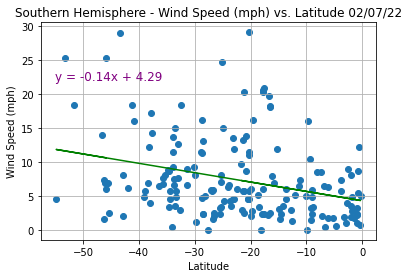

In [62]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(slat, swind)
regress_values = slat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(slat, swind)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude 02/07/22' )
plt.plot(slat, regress_values,"g-")
plt.annotate(line_eq,(-55, 22),fontsize=12,color="purple")
plt.grid()
print(f"The r-value is: {rvalue**2}")
plt.savefig('Images/southernlat_vs_windspeed.png')
plt.show()

In [63]:
#There does not appear to be any correlation between wind speed and latitude in the southern hemisphere. The r-value is very close to 0.
swind.describe()


count    174.000000
mean       7.339195
std        5.967443
min        0.000000
25%        3.000000
50%        5.760000
75%        8.985000
max       29.080000
Name: Wind Speed, dtype: float64

In [64]:
#FINAL OBSERVATIONS. 
#1. The southern hemisphere does not have reliable trends compared to the northern hemisphere.
#2. There is no correlation between cloudiness and latitude across both hemispheres.
#3. As you get further away from the equator, the data becomes less predictable. 
#4. With climate change, I anticipate that it will be harder to predict data because ocean temperatures will rise and the polar ice caps will 
#   melt causing the weather trends all over the world to shift. There will be more extreme weather events like tornadoes, hurricanes, floods
#   which can affect the humidity, wind speed and max temps and as ocean levels rise, coastal climates around the world will be forever changed.

In [65]:
#Sources:
#1. https://www.thoughtco.com/northern-vs-southern-hemisphere-weather-3444434
#2. https://en.wikipedia.org/wiki/Main_Page
#3. https://www.thinglink.com/scene/709050972206268416
#4. https://www.surveysystem.com/correlation.htm#:~:text=The%20main%20result%20of%20a,no%20relationship%20between%20the%20variables.
#5. https://en.wikipedia.org/wiki/Linear_regression#:~:text=In%20statistics%2C%20linear%20regression%20is,as%20dependent%20and%20independent%20variables).&text=Linear%20regression%20has%20many%20practical%20uses.
#6. https://www.geeksforgeeks.org/python-pandas-dataframe-describe-method/